In [1]:
import pandas as pd
import numpy as np


In [39]:
mapping_table = {
    '1': 'chr1',
    '2': 'chr2',
    '3': 'chr3',
    '4': 'chr4',
    '5': 'chr5',
    '6': 'chr6',
    '7': 'chr7',
    '8': 'chr8',
    '9': 'chr9',
    '10': 'chr10',
    '11': 'chr11',
    '12': 'chr12',
    '13': 'chr13',
    '14': 'chr14',
    '15': 'chr15',
    '16': 'chr16',
    '17': 'chr17',
    '18': 'chr18',
    '19': 'chr19',
    '20': 'chr20',
    '21': 'chr21',
    '22': 'chr22',
    'X': 'chrX',
    'Y': 'chrY',
    'MT': 'chrM'
}


# Convert fimo.tsv to bed format

In [2]:
# Load the TSV file into a DataFrame
#file_path=input("Give fimo.tsv file path: ")
file_path = '/mnt/raid1/thalassini/home/Desktop/ENCODE_CHIP_new/10_RUN/CTCF/run_3/fimo.tsv'
df = pd.read_csv(file_path, sep='\t')
df.dropna(inplace=True)

# Display the DataFrame
df

,motif_id,motif_alt_id,sequence_name,start,stop,strand,score,p-value,q-value,matched_sequence
0,MA0139.1,CTCF,PEAK_31745::chr2:231612291-231613200,430.0,448.0,+,26.98390,5.140000e-12,0.000086,TGGCCACCAGGGGGCGCCG
1,MA0139.1,CTCF,PEAK_39733::chr4:5821399-5822137,386.0,404.0,+,26.93550,7.480000e-12,0.000086,CGGCCACCAGGGGGCGCCA
2,MA0139.1,CTCF,PEAK_37605::chr3:98022943-98023869,469.0,487.0,-,26.93550,7.480000e-12,0.000086,CGGCCACCAGGGGGCGCCA
3,MA0139.1,CTCF,PEAK_21535::chr16:84970189-84971196,521.0,539.0,-,26.93550,7.480000e-12,0.000086,CGGCCACCAGGGGGCGCCA
4,MA0139.1,CTCF,PEAK_45186::chr5:137498856-137499963,541.0,559.0,-,26.93550,7.480000e-12,0.000086,CGGCCACCAGGGGGCGCCA
...,...,...,...,...,...,...,...,...,...,...
109603,MA0139.1,CTCF,NOPEAK_136151::chr9:88528515-88530209,1032.0,1050.0,-,8.22581,8.470000e-05,0.044300,TGGGCTGCAGGTGCCACAG
109604,MA0139.1,CTCF,NOPEAK_141646::chrX:47227513-47229170,1203.0,1221.0,-,8.22581,8.470000e-05,0.044300,CTGCCTGTGGGGGAAAGCA
109605,MA0139.1,CTCF,PEAK_2707::chr1:109487156-109488768,1234.0,1252.0,-,8.22581,8.470000e-05,0.044300,CTGCCTGTTGAGGTCGCAC
109606,MA0139.1,CTCF,PEAK_31756::chr2:231713127-231714503,1356.0,1374.0,-,8.22581,8.470000e-05,0.044300,GGGCAGGTAGAGGGAACTG


## Rename columns


In [3]:
df.rename(columns={"sequence_name": "Chromosome", "start": "Start", "stop": "End"}, inplace=True)
df


,motif_id,motif_alt_id,Chromosome,Start,End,strand,score,p-value,q-value,matched_sequence
0,MA0139.1,CTCF,PEAK_31745::chr2:231612291-231613200,430.0,448.0,+,26.98390,5.140000e-12,0.000086,TGGCCACCAGGGGGCGCCG
1,MA0139.1,CTCF,PEAK_39733::chr4:5821399-5822137,386.0,404.0,+,26.93550,7.480000e-12,0.000086,CGGCCACCAGGGGGCGCCA
2,MA0139.1,CTCF,PEAK_37605::chr3:98022943-98023869,469.0,487.0,-,26.93550,7.480000e-12,0.000086,CGGCCACCAGGGGGCGCCA
3,MA0139.1,CTCF,PEAK_21535::chr16:84970189-84971196,521.0,539.0,-,26.93550,7.480000e-12,0.000086,CGGCCACCAGGGGGCGCCA
4,MA0139.1,CTCF,PEAK_45186::chr5:137498856-137499963,541.0,559.0,-,26.93550,7.480000e-12,0.000086,CGGCCACCAGGGGGCGCCA
...,...,...,...,...,...,...,...,...,...,...
109603,MA0139.1,CTCF,NOPEAK_136151::chr9:88528515-88530209,1032.0,1050.0,-,8.22581,8.470000e-05,0.044300,TGGGCTGCAGGTGCCACAG
109604,MA0139.1,CTCF,NOPEAK_141646::chrX:47227513-47229170,1203.0,1221.0,-,8.22581,8.470000e-05,0.044300,CTGCCTGTGGGGGAAAGCA
109605,MA0139.1,CTCF,PEAK_2707::chr1:109487156-109488768,1234.0,1252.0,-,8.22581,8.470000e-05,0.044300,CTGCCTGTTGAGGTCGCAC
109606,MA0139.1,CTCF,PEAK_31756::chr2:231713127-231714503,1356.0,1374.0,-,8.22581,8.470000e-05,0.044300,GGGCAGGTAGAGGGAACTG


In [4]:
df['Chromosome'].str.extract(r'(chr[^:]+)')


,0
0,chr2
1,chr4
2,chr3
3,chr16
4,chr5
...,...
109603,chr9
109604,chrX
109605,chr1
109606,chr2


In [5]:
# Extracting required information using regular expressions
pattern = r'(PEAK_\d+)::(chr[^:]+):(\d+)-(\d+)'
extracted = df['Chromosome'].str.extract(pattern)

# Renaming columns
extracted.columns = ['Peak', 'Chromosome', 'Peak Start', 'Peak End']

# Adding 'Peak Start' and 'Peak End' columns to the DataFrame
df['Peak Start'] = extracted['Peak Start']
df['Peak End'] = extracted['Peak End']

df['Peak Start'] = pd.to_numeric(df['Peak Start'], errors='coerce')
df['Peak End'] = pd.to_numeric(df['Peak End'], errors='coerce')
df['Start'] = df['Start'] + df['Peak Start']
df['End'] = df['End'] + df['Peak Start']

In [6]:
# Filter rows that start with 'PEAK'
df = df[df['Chromosome'].str.startswith('PEAK')]

# Extract the 'chr' part from the 'Chromosome' column using .loc
df['Chromosome'] = df['Chromosome'].str.extract(r'(chr[^:]+)')
df

/tmp/ipykernel_3383696/2991550806.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Chromosome'] = df['Chromosome'].str.extract(r'(chr[^:]+)')


,motif_id,motif_alt_id,Chromosome,Start,End,strand,score,p-value,q-value,matched_sequence,Peak Start,Peak End
0,MA0139.1,CTCF,chr2,231612721.0,231612739.0,+,26.98390,5.140000e-12,0.000086,TGGCCACCAGGGGGCGCCG,231612291,231613200
1,MA0139.1,CTCF,chr4,5821785.0,5821803.0,+,26.93550,7.480000e-12,0.000086,CGGCCACCAGGGGGCGCCA,5821399,5822137
2,MA0139.1,CTCF,chr3,98023412.0,98023430.0,-,26.93550,7.480000e-12,0.000086,CGGCCACCAGGGGGCGCCA,98022943,98023869
3,MA0139.1,CTCF,chr16,84970710.0,84970728.0,-,26.93550,7.480000e-12,0.000086,CGGCCACCAGGGGGCGCCA,84970189,84971196
4,MA0139.1,CTCF,chr5,137499397.0,137499415.0,-,26.93550,7.480000e-12,0.000086,CGGCCACCAGGGGGCGCCA,137498856,137499963
...,...,...,...,...,...,...,...,...,...,...,...,...
109600,MA0139.1,CTCF,chr2,176141095.0,176141113.0,-,8.22581,8.470000e-05,0.044300,CAGCCTGTTGGAGGAGGCA,176140127,176141369
109601,MA0139.1,CTCF,chr15,59725470.0,59725488.0,-,8.22581,8.470000e-05,0.044300,CCCCAAAAAGGGGGCACCA,59724496,59725599
109605,MA0139.1,CTCF,chr1,109488390.0,109488408.0,-,8.22581,8.470000e-05,0.044300,CTGCCTGTTGAGGTCGCAC,109487156,109488768
109606,MA0139.1,CTCF,chr2,231714483.0,231714501.0,-,8.22581,8.470000e-05,0.044300,GGGCAGGTAGAGGGAACTG,231713127,231714503


## Convert coordinated to integers

In [7]:
df["Start"]=df["Start"].astype('int')
df["End"]=df["End"].astype('int')

/tmp/ipykernel_3383696/603533501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Start"]=df["Start"].astype('int')
/tmp/ipykernel_3383696/603533501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["End"]=df["End"].astype('int')


## Merge "p-value, q-value & matched_sequence" in column "name" 

In [8]:
# Concatenate columns into a new 'name' column
df['name'] = df['motif_alt_id'].astype(str) + '_' + df['p-value'].astype(str) + '_' + df['q-value'].astype(str) + '_' + df['matched_sequence']

# Drop the original columns
df.drop(['motif_id', 'p-value', 'q-value', 'matched_sequence', 'motif_alt_id' ], axis=1, inplace=True)

# Display the updated DataFrame with the new 'name' column and without the original col
df

/tmp/ipykernel_3383696/2384759376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name'] = df['motif_alt_id'].astype(str) + '_' + df['p-value'].astype(str) + '_' + df['q-value'].astype(str) + '_' + df['matched_sequence']
/tmp/ipykernel_3383696/2384759376.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['motif_id', 'p-value', 'q-value', 'matched_sequence', 'motif_alt_id' ], axis=1, inplace=True)


,Chromosome,Start,End,strand,score,Peak Start,Peak End,name
0,chr2,231612721,231612739,+,26.98390,231612291,231613200,CTCF_5.14e-12_8.56e-05_TGGCCACCAGGGGGCGCCG
1,chr4,5821785,5821803,+,26.93550,5821399,5822137,CTCF_7.48e-12_8.56e-05_CGGCCACCAGGGGGCGCCA
2,chr3,98023412,98023430,-,26.93550,98022943,98023869,CTCF_7.48e-12_8.56e-05_CGGCCACCAGGGGGCGCCA
3,chr16,84970710,84970728,-,26.93550,84970189,84971196,CTCF_7.48e-12_8.56e-05_CGGCCACCAGGGGGCGCCA
4,chr5,137499397,137499415,-,26.93550,137498856,137499963,CTCF_7.48e-12_8.56e-05_CGGCCACCAGGGGGCGCCA
...,...,...,...,...,...,...,...,...
109600,chr2,176141095,176141113,-,8.22581,176140127,176141369,CTCF_8.47e-05_0.0443_CAGCCTGTTGGAGGAGGCA
109601,chr15,59725470,59725488,-,8.22581,59724496,59725599,CTCF_8.47e-05_0.0443_CCCCAAAAAGGGGGCACCA
109605,chr1,109488390,109488408,-,8.22581,109487156,109488768,CTCF_8.47e-05_0.0443_CTGCCTGTTGAGGTCGCAC
109606,chr2,231714483,231714501,-,8.22581,231713127,231714503,CTCF_8.47e-05_0.0443_GGGCAGGTAGAGGGAACTG


In [11]:
# Calculate the differences
differences = df['End'] - df['Start']

# Check if all differences are the same
if differences.nunique() == 1:
    print("All differences are the same.")
    common_difference = differences.iloc[0]
    print("Common difference is the motif lenght:", common_difference)
else:
    print("Differences are not all the same.")

All differences are the same.
Common difference is the motif lenght: 18


In [12]:
columns=df.columns
columns

Index(['Chromosome', 'Start', 'End', 'strand', 'score', 'Peak Start',
       'Peak End', 'name'],
      dtype='object')

 ## Filter from variant chromosome names
 

In [13]:
#Discover the unique sequence names in fimo.tsv
for sequence_name in df['Chromosome'].unique():
    print(sequence_name)

chr2
chr4
chr3
chr16
chr5
chr17
chr12
chr6
chr7
chr19
chr13
chr10
chr1
chr14
chr9
chr11
chr15
chr22
chr20
chr8
chr21
chr18
chrX
chrY


In [14]:
# Expected list of NCBI values
expected_list = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12',
                 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrY', 'chrM']

# Filter rows based on 'NCBI' column values matching the expected list
df = df[df['Chromosome'].isin(expected_list)]

In [15]:
df

,Chromosome,Start,End,strand,score,Peak Start,Peak End,name
0,chr2,231612721,231612739,+,26.98390,231612291,231613200,CTCF_5.14e-12_8.56e-05_TGGCCACCAGGGGGCGCCG
1,chr4,5821785,5821803,+,26.93550,5821399,5822137,CTCF_7.48e-12_8.56e-05_CGGCCACCAGGGGGCGCCA
2,chr3,98023412,98023430,-,26.93550,98022943,98023869,CTCF_7.48e-12_8.56e-05_CGGCCACCAGGGGGCGCCA
3,chr16,84970710,84970728,-,26.93550,84970189,84971196,CTCF_7.48e-12_8.56e-05_CGGCCACCAGGGGGCGCCA
4,chr5,137499397,137499415,-,26.93550,137498856,137499963,CTCF_7.48e-12_8.56e-05_CGGCCACCAGGGGGCGCCA
...,...,...,...,...,...,...,...,...
109600,chr2,176141095,176141113,-,8.22581,176140127,176141369,CTCF_8.47e-05_0.0443_CAGCCTGTTGGAGGAGGCA
109601,chr15,59725470,59725488,-,8.22581,59724496,59725599,CTCF_8.47e-05_0.0443_CCCCAAAAAGGGGGCACCA
109605,chr1,109488390,109488408,-,8.22581,109487156,109488768,CTCF_8.47e-05_0.0443_CTGCCTGTTGAGGTCGCAC
109606,chr2,231714483,231714501,-,8.22581,231713127,231714503,CTCF_8.47e-05_0.0443_GGGCAGGTAGAGGGAACTG


## Save df as .bed

In [16]:
# Save the csv file 
df.to_csv('fimo_full.bed', sep='\t', index=False, header=False)

# Mart to bed
Convert mart_export.txt to bed format 

In [17]:
import pandas as pd

# Load the TSV file into a DataFrame
#file_path=input("Give mart_export_unique.txt file path: ")
file_path = '/mnt/raid1/thalassini/home/Downloads/mart_export.txt'
mart_df = pd.read_csv(file_path, sep='\t')
mart_df.dropna(inplace=True)

# Display the DataFrame
mart_df

,Chromosome/scaffold name,Start (bp),End (bp),Feature type
0,18,35116801,35120999,Enhancer
1,6,90249202,90257999,Enhancer
2,7,39894801,39895400,Enhancer
3,15,63059401,63062399,Enhancer
4,3,119868001,119868400,Enhancer
...,...,...,...,...
305075,8,98939200,98949401,Promoter
305076,4,39364800,39367201,Promoter
305077,X,152752601,152755400,Promoter
305078,16,58495400,58496001,Promoter


In [20]:
mart_df.columns

Index(['Chromosome/scaffold name', 'Start (bp)', 'End (bp)', 'Feature type'], dtype='object')

In [23]:
import matplotlib.pyplot as plt

Differences are not all the same.


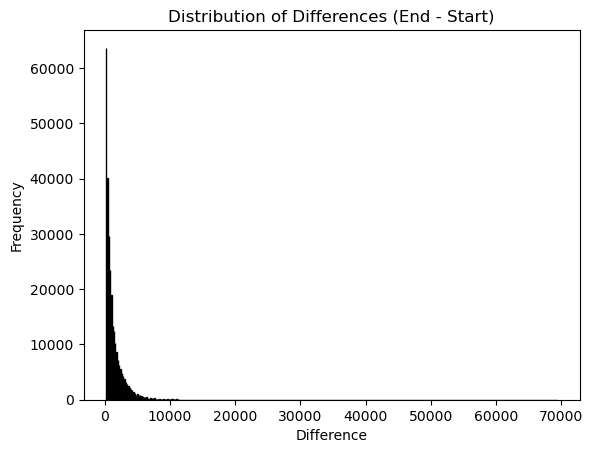

In [24]:
# Calculate the differences
differences = mart_df['End (bp)'] - mart_df['Start (bp)']

# Check if all differences are the same
if differences.nunique() == 1:
    print("All differences are the same.")
    common_difference = differences.iloc[0]
    print("Common difference is the motif lenght:", common_difference)
else:
    print("Differences are not all the same.")
     
    # Plot histogram of differences
    plt.hist(differences, bins='auto', color='blue', edgecolor='black')
    plt.title('Distribution of Differences (End - Start)')
    plt.xlabel('Difference')
    plt.ylabel('Frequency')
    plt.show()

In [336]:
# Mapping table
mapping_table = {
    '1': 'chr1',
    '2': 'chr2',
    '3': 'chr3',
    '4': 'chr4',
    '5': 'chr5',
    '6': 'chr6',
    '7': 'chr7',
    '8': 'chr8',
    '9': 'chr9',
    '10': 'chr10',
    '11': 'chr11',
    '12': 'chr12',
    '13': 'chr13',
    '14': 'chr14',
    '15': 'chr15',
    '16': 'chr16',
    '17': 'chr17',
    '18': 'chr18',
    '19': 'chr19',
    '20': 'chr20',
    '21': 'chr21',
    '22': 'chr22',
    'X': 'chrX',
    'Y': 'chrY',
    'MT': 'chrM'
}

In [337]:
mart_df['Chromosome/scaffold name'] = mart_df['Chromosome/scaffold name'].map(mapping_table)
mart_df

,Chromosome/scaffold name,Start (bp),End (bp),Feature type
0,chr18,35116801,35120999,Enhancer
1,chr6,90249202,90257999,Enhancer
2,chr7,39894801,39895400,Enhancer
3,chr15,63059401,63062399,Enhancer
4,chr3,119868001,119868400,Enhancer
...,...,...,...,...
305075,chr8,98939200,98949401,Promoter
305076,chr4,39364800,39367201,Promoter
305077,chrX,152752601,152755400,Promoter
305078,chr16,58495400,58496001,Promoter


In [338]:
# Save the csv file 
mart_df.to_csv('mart.bed', sep='\t', index=False, header=False)

# Run bedtools intesect to create filtered fimo
>> bedtools intersect -a /mnt/raid1/thalassini/home/Downloads/fimo_full.bed  -b /mnt/raid1/thalassini/home/Downloads/mart.bed > ensemlb_filtered_fimo.bed


In [27]:
columns=['Chromosome', 'Start', 'End', 'strand', 'score', 'name']

# Display filtered_fimo df

In [28]:
# Load the BED file into a DataFrame
#file_path=input("Give ensemlb_filtered_fimo.bed file path: ")
file_path = '/mnt/raid1/thalassini/home/ensemlb_filtered_fimo.bed'
filtered_df = pd.read_csv(file_path, sep='\t')
filtered_df.dropna(inplace=True)
filtered_df.columns=columns
# Display the DataFrame
filtered_df

,Chromosome,Start,End,strand,score,name
0,chr1,869920,869934,+,24.2951,CTCF_2.93e-10_0.026_GCCACCAGGGGGCGC
1,chr1,904770,904784,+,24.2951,CTCF_2.93e-10_0.026_GCCACCAGGGGGCGC
2,chr6,1397165,1397179,-,24.2951,CTCF_2.93e-10_0.026_GCCACCAGGGGGCGC
3,chr4,1579280,1579294,-,24.2951,CTCF_2.93e-10_0.026_GCCACCAGGGGGCGC
4,chrX,9995929,9995943,+,24.2951,CTCF_2.93e-10_0.026_GCCACCAGGGGGCGC
...,...,...,...,...,...,...
104638,chr2,239339669,239339683,-,10.0984,CTCF_4.49e-05_0.548_GCCAGGAGATTGCAG
104639,chr2,241355101,241355115,+,10.0984,CTCF_4.49e-05_0.548_GCCACATGGTGACAG
104640,chr1,241396943,241396957,+,10.0984,CTCF_4.49e-05_0.548_GCCACATGGTGACAG
104641,chr2,241764826,241764840,-,10.0984,CTCF_4.49e-05_0.548_AGCAGGAGAGGGAGC


Differences are not all the same.


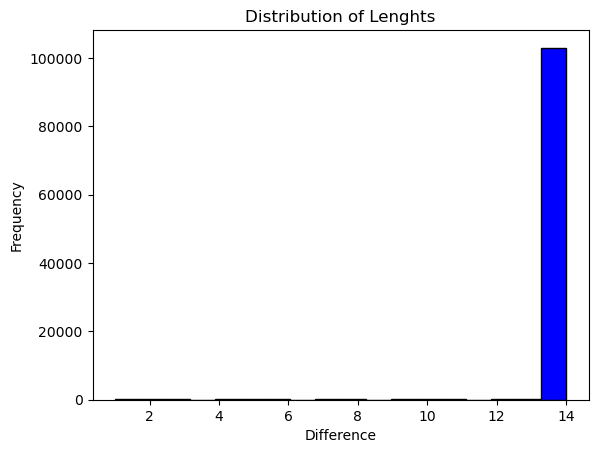

In [36]:
# Calculate the differences
differences = filtered_df['End'] - filtered_df['Start']

# Check if all differences are the same
if differences.nunique() == 1:
    print("All differences are the same.")
    common_difference = differences.iloc[0]
    print("Common difference is the motif lenght:", common_difference)
else:
    print("Differences are not all the same.")
     
    # Plot histogram of differences
    plt.hist(differences, bins='auto', color='blue', edgecolor='black')
    plt.title('Distribution of Lenghts')
    plt.xlabel('Difference')
    plt.ylabel('Frequency')
    plt.show()

In [31]:
print(f" The promoter/enhancer filtered data is reduced by {100-len(filtered_df)* 100/len(df)}% from initial fimo results")

 The promoter/enhancer filtered data is reduced by -49.411025600753874% from initial fimo results


# Run bedtools intesect to create chipseq_filtered fimo
>> bedtools intersect -a ensemlb_filtered_fimo.bed -b /mnt/raid1/thalassini/home/Downloads/ENCFF970MXD.bed > chipseq_filtered.bed

# Display chipseq_filtered df

In [33]:
# Load the BED file into a DataFrame
#file_path=input("Give chipseq_filtered_fimo.bed file path: ")
file_path = '/mnt/raid1/thalassini/home/chipseq_filtered.bed'
chipseq_filtered_df = pd.read_csv(file_path, sep='\t')
chipseq_filtered_df.dropna(inplace=True)
chipseq_filtered_df.columns=columns
# Display the DataFrame
chipseq_filtered_df

,Chromosome,Start,End,strand,score,name
0,chr1,869920,869934,+,24.2951,CTCF_2.93e-10_0.026_GCCACCAGGGGGCGC
1,chr1,904770,904784,+,24.2951,CTCF_2.93e-10_0.026_GCCACCAGGGGGCGC
2,chr6,1397165,1397179,-,24.2951,CTCF_2.93e-10_0.026_GCCACCAGGGGGCGC
3,chr4,1579280,1579294,-,24.2951,CTCF_2.93e-10_0.026_GCCACCAGGGGGCGC
4,chrX,9995929,9995943,+,24.2951,CTCF_2.93e-10_0.026_GCCACCAGGGGGCGC
...,...,...,...,...,...,...
17931,chr4,112637587,112637601,+,10.0984,CTCF_4.49e-05_0.548_GCCAGAAGATAGCGA
17932,chr9,122810697,122810711,-,10.0984,CTCF_4.49e-05_0.548_ACCACAATAGGGCAG
17933,chr9,122810697,122810711,-,10.0984,CTCF_4.49e-05_0.548_ACCACAATAGGGCAG
17934,chr7,131581578,131581592,+,10.0984,CTCF_4.49e-05_0.548_GCCAACAAAGGGCAG


Differences are not all the same.


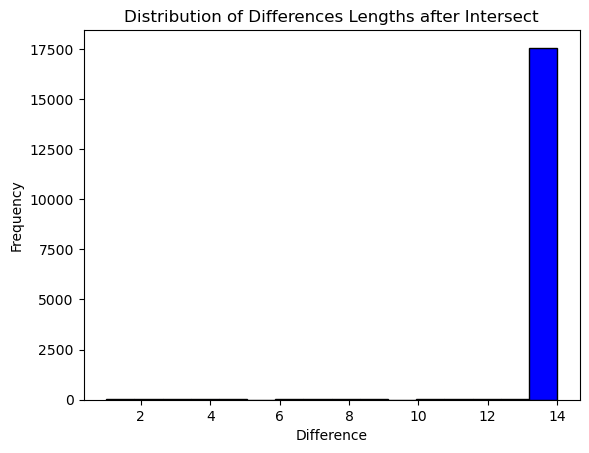

In [47]:
# Calculate the differences
differences = chipseq_filtered_df['End'] - chipseq_filtered_df['Start']

# Check if all differences are the same
if differences.nunique() == 1:
    print("All differences are the same.")
    common_difference = differences.iloc[0]
    print("Common difference is the motif lenght:", common_difference)
else:
    print("Lenghts are not all the same.")
     
    # Plot histogram of differences
    plt.hist(differences, bins='auto', color='blue', edgecolor='black')
    plt.title('Distribution of Differences Lengths after Intersect')
    plt.xlabel('Difference')
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
for chromosome in chipseq_filtered_df["Chromosome"]:
    print(chromosome)

In [ ]:
print(f" The chipseq filtered data is reduced by {100-len(chipseq_filtered_df)* 100/len(df)}% from initial fimo results")

# Find sequence from coordinates

In [37]:
#/home/marina/Downloads/phix.fasta
from pyfaidx import Fasta

# Path to your reference genome FASTA file
reference_genome_file = '/mnt/raid1/thalassini/home/Downloads/Homo_sapiens.GRCh38.dna.toplevel.fa'



# Load the reference genome using pyfaidx
fasta = Fasta(reference_genome_file)

# List all chromosome names in the reference genome file
chromosome_names = fasta.keys()

# Display the list of chromosome names
print(chromosome_names)



odict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', 'X', 'Y', 'MT', 'HG76_PATCH', 'HG2365_PATCH', 'HSCHR15_4_CTG8', 'HSCHR6_MHC_SSTO_CTG1', 'HSCHR6_MHC_MCF_CTG1', 'HSCHR6_MHC_COX_CTG1', 'HSCHR6_MHC_MANN_CTG1', 'HSCHR6_MHC_APD_CTG1', 'HSCHR6_MHC_QBL_CTG1', 'HSCHR6_MHC_DBB_CTG1', 'HSCHR17_7_CTG4', 'HSCHR16_1_CTG1', 'HSCHR15_6_CTG8', 'HG926_PATCH', 'HSCHR17_1_CTG5', 'HSCHR5_2_CTG1_1', 'HG1343_HG173_HG459_PATCH', 'HSCHR14_7_CTG1', 'HSCHR17_2_CTG5', 'HSCHR14_3_CTG1', 'HG2280_PATCH', 'HSCHR5_1_CTG1_1', 'HSCHR7_2_CTG6', 'HSCHR19LRC_LRC_J_CTG3_1', 'HSCHR19_4_CTG3_1', 'HSCHR19LRC_LRC_S_CTG3_1', 'HSCHR19LRC_LRC_I_CTG3_1', 'HG1815_PATCH', 'HG2265_PATCH', 'HSCHR19LRC_LRC_T_CTG3_1', 'HSCHR19LRC_COX1_CTG3_1', 'HSCHR19LRC_PGF1_CTG3_1', 'HSCHR8_8_CTG1', 'HG2275_PATCH', 'HSCHR1_3_CTG32_1', 'HSCHR6_1_CTG8', 'HG1532_PATCH', 'HSCHR1_5_CTG31', 'HSCHR19LRC_PGF2_CTG3_1', 'HSCHR19LRC_COX2_CTG3_1', 'HG2526_HG2573_PATCH', 'HG1_PA

In [40]:
# Replace the first 25 keys with mapping_table values
updated_fasta = {}

count = 0
for k, v in fasta.items():
    if count < 25:
        updated_fasta[mapping_table.get(k, k)] = v
        count += 1
    else:
        updated_fasta[k] = v
        


# Create true positive set

In [43]:
true_positives=[]
# Loop through the DataFrame and retrieve values of 'Chromosome', 'Start', and 'End' columns for each row
for index, row in chipseq_filtered_df.iterrows():
    chromosome = row['Chromosome']
    start = row['Start']
    end = row['End']
    middle=start+(end-start)/2
    true_positives.append(updated_fasta[chromosome][start-1000:end+1000].seq)
    


In [44]:
true_positives[1]

'TTTCCTTAGGGCAGCCCTAGGCGCAGCGGTGCAAGGAGAGCCACATTTACCCCTGGCGCTGCACGGCCCTGAGGCTGGGCAAGGCTGTCCACCCCGCTGTCAGAACCCCAGCAGGGAAGGTGTCCAGAAGGCAGTCCTGGGAACCCTGCACAGAGGCCCAGCGGGCACAAGGTTGGGGCAGCTCTGTTCCCAGCAGGCCGAGCCCGGGTGGCTGGAGAGGGAGCTCTGGAAGGTCAGCCTAGGGGCCGTCGGCCCCTGCAGACCCTGTGCCCAGCCCAGCATCCCGGGGAGCTCCCTCCACATGCTCATCTCACGAGGTTCCTGCTGCACTCAGAGTGGAGGATGGGAGGCCTGGGGCGGAGGGCCGGGGCTTTGGAATGGCTGAGGGGGACAAGGATGCACAAGGGGCCAGTGCAGAGGACAGCGCGACTCCCAGGGGCCCGGGGTCCTGGTCTTCCTGGTCCTGCCGTTTTTATTAGAAGCGAGCCCTCCACCCCAGTGGGTGTAGAGCCCAGGACGCAGCAGAGGGTGGGGGGGTGGGGGGCGGCATCGGGGCAGGTGGCAACCCCTTGGACGCAGGCTCAGGACGCCAGGGTCAGGGCGTGAGTGCCGGGGCCCCCTCAAAGCCGCGGGGTCCAAAGAGGCCGCCGGCCCCGGCCCCGCCCTCTGCTCCTCCTCCCCCTCCACCGCCAGGCCCGGGTGGCCGCCGCCTCCTCCGAACGCGGCCGCCTCCTCCTCCGAACGTGGCCTCCTCCGAACGCGGCCGCCTCCTCCTCCGAACGCGGCCGCCTCCTCCTCCGAACGTGGCCTCCTCCGAACGTGGCCGCCTCCTCCTCCGAACGTGGCCTCCTCCGAACGCGGCCGCCGCCTCCTCCGAACGCGGCCTCCTCCTCCTCCGAACGCGGCCGCCTCCTCCTCCGAACGTGGCCGCCTCCGAACGTGGCCGCCGCCTCCTCCGAACGTGGCCGCTTCCGCAGCGCCCGGCGCAGGCCGCACTCC

Max length:2014, Min length: 2001


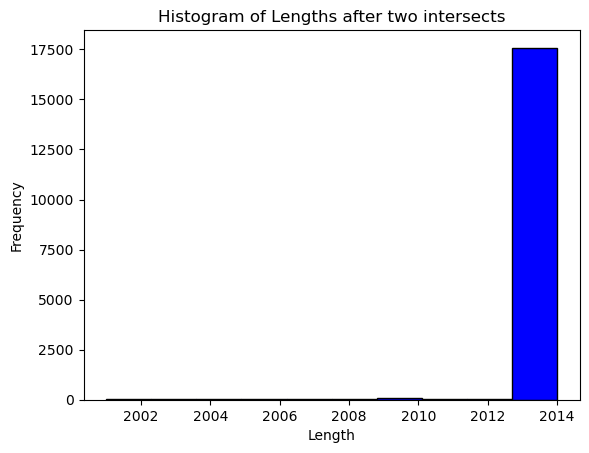

In [46]:
lengths= [len(item) for item in true_positives] 
print(f'Max length:{max(lengths)}, Min length: {min(lengths)}')
import matplotlib.pyplot as plt
# Plotting the histogram
plt.hist(lengths, bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Lengths after two intersects')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

# Create true negative set

## Create negative df by excluding the rows that belong to the ensembl_filtered df 

In [ ]:
# Merge the DataFrames based on specific columns and keep rows that do not exist in df_filtered
merged = df.merge(filtered_df, on=['Chromosome', 'Start', 'End', 'strand', 'score', 'name'], how='outer', indicator=True)
negative_df = merged[merged['_merge'] == 'left_only'].drop('_merge', axis=1)



In [ ]:
negative_df

In [ ]:
print(f"The percentage of the true negative set is {len(negative_df)/len(df)*100}% of the fimo results")

In [ ]:
true_negatives=[]
# Loop through the DataFrame and retrieve values of 'Chromosome', 'Start', and 'End' columns for each row
for index, row in negative_df.iterrows():
    chromosome = row['Chromosome']
    start = row['Start']
    end = row['End']
    true_negatives.append(updated_fasta[chromosome][start-100:end+100].seq)
    


In [ ]:
print(f"We have {len(true_negatives)} negative sequences and {len(true_positives)} positive sequences")

In [ ]:
print(f"True positives are {len(true_positives)/(len(true_negatives)+len(true_positives))*100}% of the dataset")

In [ ]:
print(f"True negatives are {len(true_negatives)/(len(true_negatives)+len(true_positives))*100}% of the dataset")

## Checking the length of the sequences

In [ ]:
# Check the length of each string in the list
lengths_pos = [len(item) for item in true_positives]

In [ ]:
max(lengths_pos),min(lengths_pos)

In [ ]:
# Check the length of each string in the list
lengths_neg = [len(item) for item in true_negatives]

In [ ]:
max(lengths_neg),min(lengths_neg)

# Combine the two sets in a df

In [ ]:

# Create DataFrames for negative and positive sequences
true_negatives_df = pd.DataFrame({'data': true_negatives, 'class': 0})
true_positives_df= pd.DataFrame({'data': true_positives, 'class': 1})

# Concatenate both DataFrames into a single DataFrame
combined_df = pd.concat([true_negatives_df, true_positives_df], ignore_index=True)

# Display the combined DataFrame
print(combined_df)

In [ ]:
# Export the DataFrame to a CSV file
combined_df.to_csv('data.csv', index=False)

In [ ]:
# Shuffle the rows of the DataFrame
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)